## 5. Convolutional neural network





In [4]:
import keras
from  keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [5]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print('liczba danych treningowych: ', x_train.shape[0])
print('liczba danych testowych:', x_test.shape[0])
print('rozmiar pojedynczego obrazka:',x_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
liczba danych treningowych:  60000
liczba danych testowych: 10000
rozmiar pojedynczego obrazka: (28, 28)


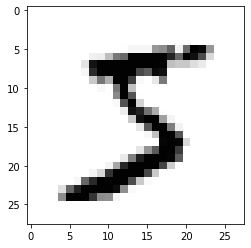

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='Greys')

In [8]:
print(keras.backend.image_data_format()) #jaki format zapisu

channels_last


In [9]:
img_rows, img_cols =28,28
if keras.backend.image_data_format()=='channel first':
  x_train=x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
  x_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
  input_shape=(1,img_rows,img_cols)
else:
  x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
  x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
  input_shape=(img_rows,img_cols,1)

print(input_shape)

(28, 28, 1)


In [10]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255


print(x_train.shape)
print(x_test.shape) #gdyby byl kolorowy to by bylo 3

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
y_train= keras.utils.to_categorical(y_train, num_classes=10)
y_test= keras.utils.to_categorical(y_test, num_classes=10)

## Building the model:

In [13]:
model =Sequential()
#ilosc filtrow, rozmiar filtru 
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #okno którym latamy
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Learning:


In [24]:
history=model.fit(x_train,y_train,batch_size=128,epochs=4,
                  validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 3s 53us/step - loss: 1.2031e-05 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9908
Epoch 2/4
60000/60000 [==============================] - 3s 52us/step - loss: 1.1173e-05 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9909
Epoch 3/4
60000/60000 [==============================] - 3s 53us/step - loss: 1.0429e-05 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9910
Epoch 4/4
60000/60000 [==============================] - 3s 53us/step - loss: 9.7124e-06 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9908


In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    # import matplotlib.pyplot as plt
    # import seaborn as sns
    # sns.set()

    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    
    """
    # import matplotlib.pyplot as plt
    # import seaborn as sns
    # sns.set()
    
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()
    
def display_augmented_images(directory, index):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[index]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(20, 14))
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

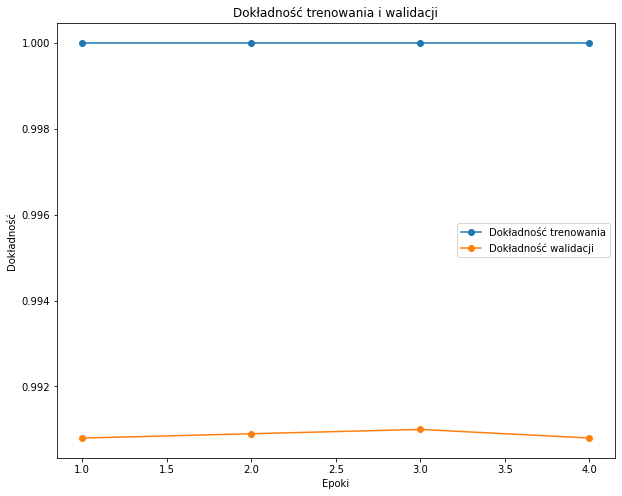

In [25]:
make_accuracy_plot(history)

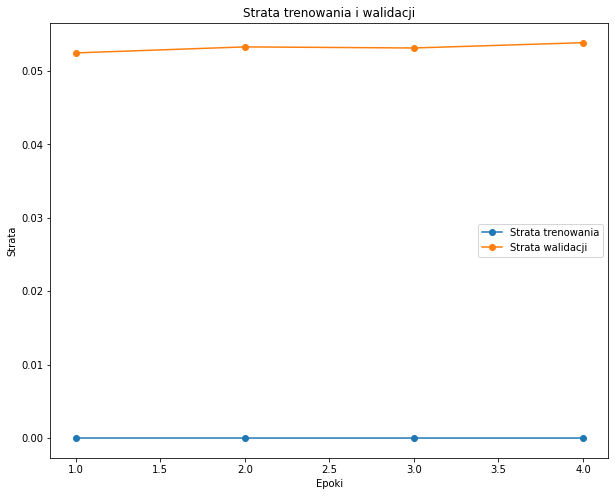

In [26]:
make_loss_plot(history)